In [2]:
import os
os.chdir('/rd2/user/xiacr/sle/other_sc_data/')
import numpy as np
import pandas as pd
import scanpy as sc
import harmonypy as hm
import importlib

import glob
import anndata as ad
import collections

import scanpy.external as sce
from mycolorpy import colorlist as mcp

import utils
importlib.reload(utils)

<module 'utils' from '/rd2/user/xiacr/sle/other_sc_data/utils.py'>

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=160, facecolor='white', fontsize=10)
sc._settings.ScanpyConfig.n_jobs = 36

scanpy==1.8.2 anndata==0.7.8 umap==0.5.2 numpy==1.19.0 scipy==1.8.0 pandas==1.4.1 scikit-learn==1.0.2 statsmodels==0.13.1 python-igraph==0.9.9 pynndescent==0.5.5


# Data loading and processing

In [3]:
nc_sle_flare = sc.read_h5ad('./h5ad/nc_19_sle_flare.h5ad')
nc_sle= sc.read_h5ad('./h5ad/nc_19_sle.h5ad')

In [6]:
nc_sle_flare.obs['dataset'] = 'nc_19'
nc_sle_flare.obs['group'] = 'sle_flare'
nc_sle.obs['dataset'] = 'nc_19'
nc_sle.obs['group'] = 'sle'
nc_sle.obs.loc[nc_sle.obs[(nc_sle.obs['index'].isin(['sample12','sample18','sample8','sample22','sample30','sample34','sample45','sample26',
                                                     'sample35','sample27','sample31','sample39']))].index.tolist(),'group'] = 'hc'
nc_sle_flare.obs['sample'] =  nc_sle_flare.obs['dataset'].astype(str) + '_' + nc_sle_flare.obs['value'].astype(str)
nc_sle.obs['sample'] = nc_sle.obs['dataset'].astype(str) + '_' + nc_sle.obs['index'].astype(str)

In [7]:
core_data =  sc.read_h5ad('./h5ad/04-pbmc_all_anno_modify_meta.h5ad')

In [8]:
core_data.obs['dataset'] = 'core_dataset'
core_data.obs['group'] = core_data.obs['group'].astype(str)
core_data.obs.loc[core_data.obs[(core_data.obs['treatment'].isin(['untreated']))].index.tolist(),'group'] = 'sle_flare'
core_data.obs.loc[core_data.obs[(core_data.obs['treatment'].isin(['treated']))].index.tolist(),'group'] = 'sle_treated'
core_data.obs.loc[core_data.obs[(core_data.obs['treatment'].isin(['HC']))].index.tolist(),'group'] = 'hc'
core_data.obs['sample'] = core_data.obs['dataset'].astype(str) + '_' + core_data.obs['orig.ident'].astype(str)

In [9]:
nbt_17= sc.read_h5ad('./h5ad/nbt_17_meta.h5ad')
pnas_19 = sc.read_h5ad('./h5ad/pnas_19_meta.h5ad')
ni_20 =  sc.read_h5ad('./h5ad/ni_20_meta.h5ad')
ebi_21 = sc.read_h5ad('./h5ad/ebi_21_meta.h5ad')

In [10]:
pnas_19.obs['group'] = 'sle' 
nbt_17.obs['dataset'] = 'nbt_17'
pnas_19.obs['dataset'] = 'pnas_19'
ni_20.obs['dataset'] = 'ni_20'
ebi_21.obs['dataset'] = 'ebi_21'

In [11]:
core_data.obs['dataset'] = core_data.obs['dataset'].astype(str)
nc_sle_flare.obs['dataset'] = nc_sle_flare.obs['dataset'].astype(str)
nc_sle.obs['dataset'] = nc_sle.obs['dataset'].astype(str)

In [12]:
adata = core_data.concatenate([nc_sle,nc_sle_flare, ebi_21,ni_20,pnas_19,nbt_17],join="outer")
adata

AnnData object with n_obs × n_vars = 1643000 × 10619
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'group', 'treatment', 'pair', 'percent_mito', 'percent_ribo', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'RNA_snn_res.0.8', 'RNA_snn_res.1', 'seurat_clusters', 'main_type', 'scrublet_doublet', 'subtype', 'RNA_snn_res.0.6', 'RNA_snn_res.1.2', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'barcode', 'dataset', 'sample', 'X', 'index', 'suffix', 'value', 'Run', 'BioSample', 'biospecimen_repository_sample_id', 'Bytes', 'Center.Name', 'Consent_Code', 'Consent', 'DATASTORE.filetype', 'DATASTORE.provider', 'DATASTORE.region', 'Experiment', 'Library.Name', 'Sample.Name', 'sex', 'submitted_subject_id', 'subject_is_affected', 'AvgSpotLen', 'Bases', 'study_disease', 'cell_type', 'batch'
    var: 'vst.mean-0', 'vst.variance-0', 'vst.variance.expected-0', 'vst.variance.standardized-0', 'vst.variable-0', 'name-1', 'name-2', 'name-3', 'vst.mean-4', 'vst.variance-4'

In [13]:
adata.obs.dataset.value_counts()
adata.obs['sample'].isna().value_counts()
# adata.obs['sample'].value_counts().sum()

False    1643000
Name: sample, dtype: int64

In [14]:
adata.write_h5ad('./output/01-pbmc_concat_raw.h5ad')

/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'orig.ident' as categorical
/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'group' as categorical
/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a futur

In [16]:
del nc_sle_flare; del nc_sle; del core_data; del ebi_21; del ni_20; del pnas_19; del nbt_17

# PBMC analysis

In [15]:
sc.pp.filter_cells(adata, min_genes=300)
sc.pp.filter_genes(adata, min_cells=20)
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

sc.pp.highly_variable_genes(adata, flavor ='seurat_v3',n_top_genes =2500, batch_key ='sample') # must specify n_top_genes when using seurat v3

sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

adata.raw = adata # You can get back an AnnData of the object in .raw by calling .raw.to_adata().
adata = adata[:, adata.var.highly_variable]

sc.pp.scale(adata, max_value=10)
sc.tl.pca(adata, svd_solver='arpack')

filtered out 14123 cells that have less than 300 genes expressed
If you pass `n_top_genes`, all cutoffs are ignored.
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'variances_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:07)


/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


... as `zero_center=True`, sparse input is densified and may lead to large memory consumption
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:12:21)


In [27]:
sce.pp.harmony_integrate(adata, 'sample',theta=1) # theta is the key parameter and I find set 1 works well

2022-03-14 11:17:58,902 - harmonypy - INFO - Iteration 1 of 10
2022-03-14 11:44:00,688 - harmonypy - INFO - Iteration 2 of 10
2022-03-14 12:09:17,414 - harmonypy - INFO - Iteration 3 of 10
2022-03-14 12:34:34,066 - harmonypy - INFO - Iteration 4 of 10
2022-03-14 13:03:01,297 - harmonypy - INFO - Iteration 5 of 10
2022-03-14 13:29:36,208 - harmonypy - INFO - Iteration 6 of 10
2022-03-14 13:57:58,163 - harmonypy - INFO - Iteration 7 of 10
2022-03-14 14:38:57,047 - harmonypy - INFO - Converged after 7 iterations


In [28]:
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50,use_rep='X_pca_harmony' )
sc.tl.leiden(adata,resolution = 0.8)

sc.tl.umap(adata)

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:04:00)
running Leiden clustering
    finished: found 27 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (1:26:15)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:50:26)


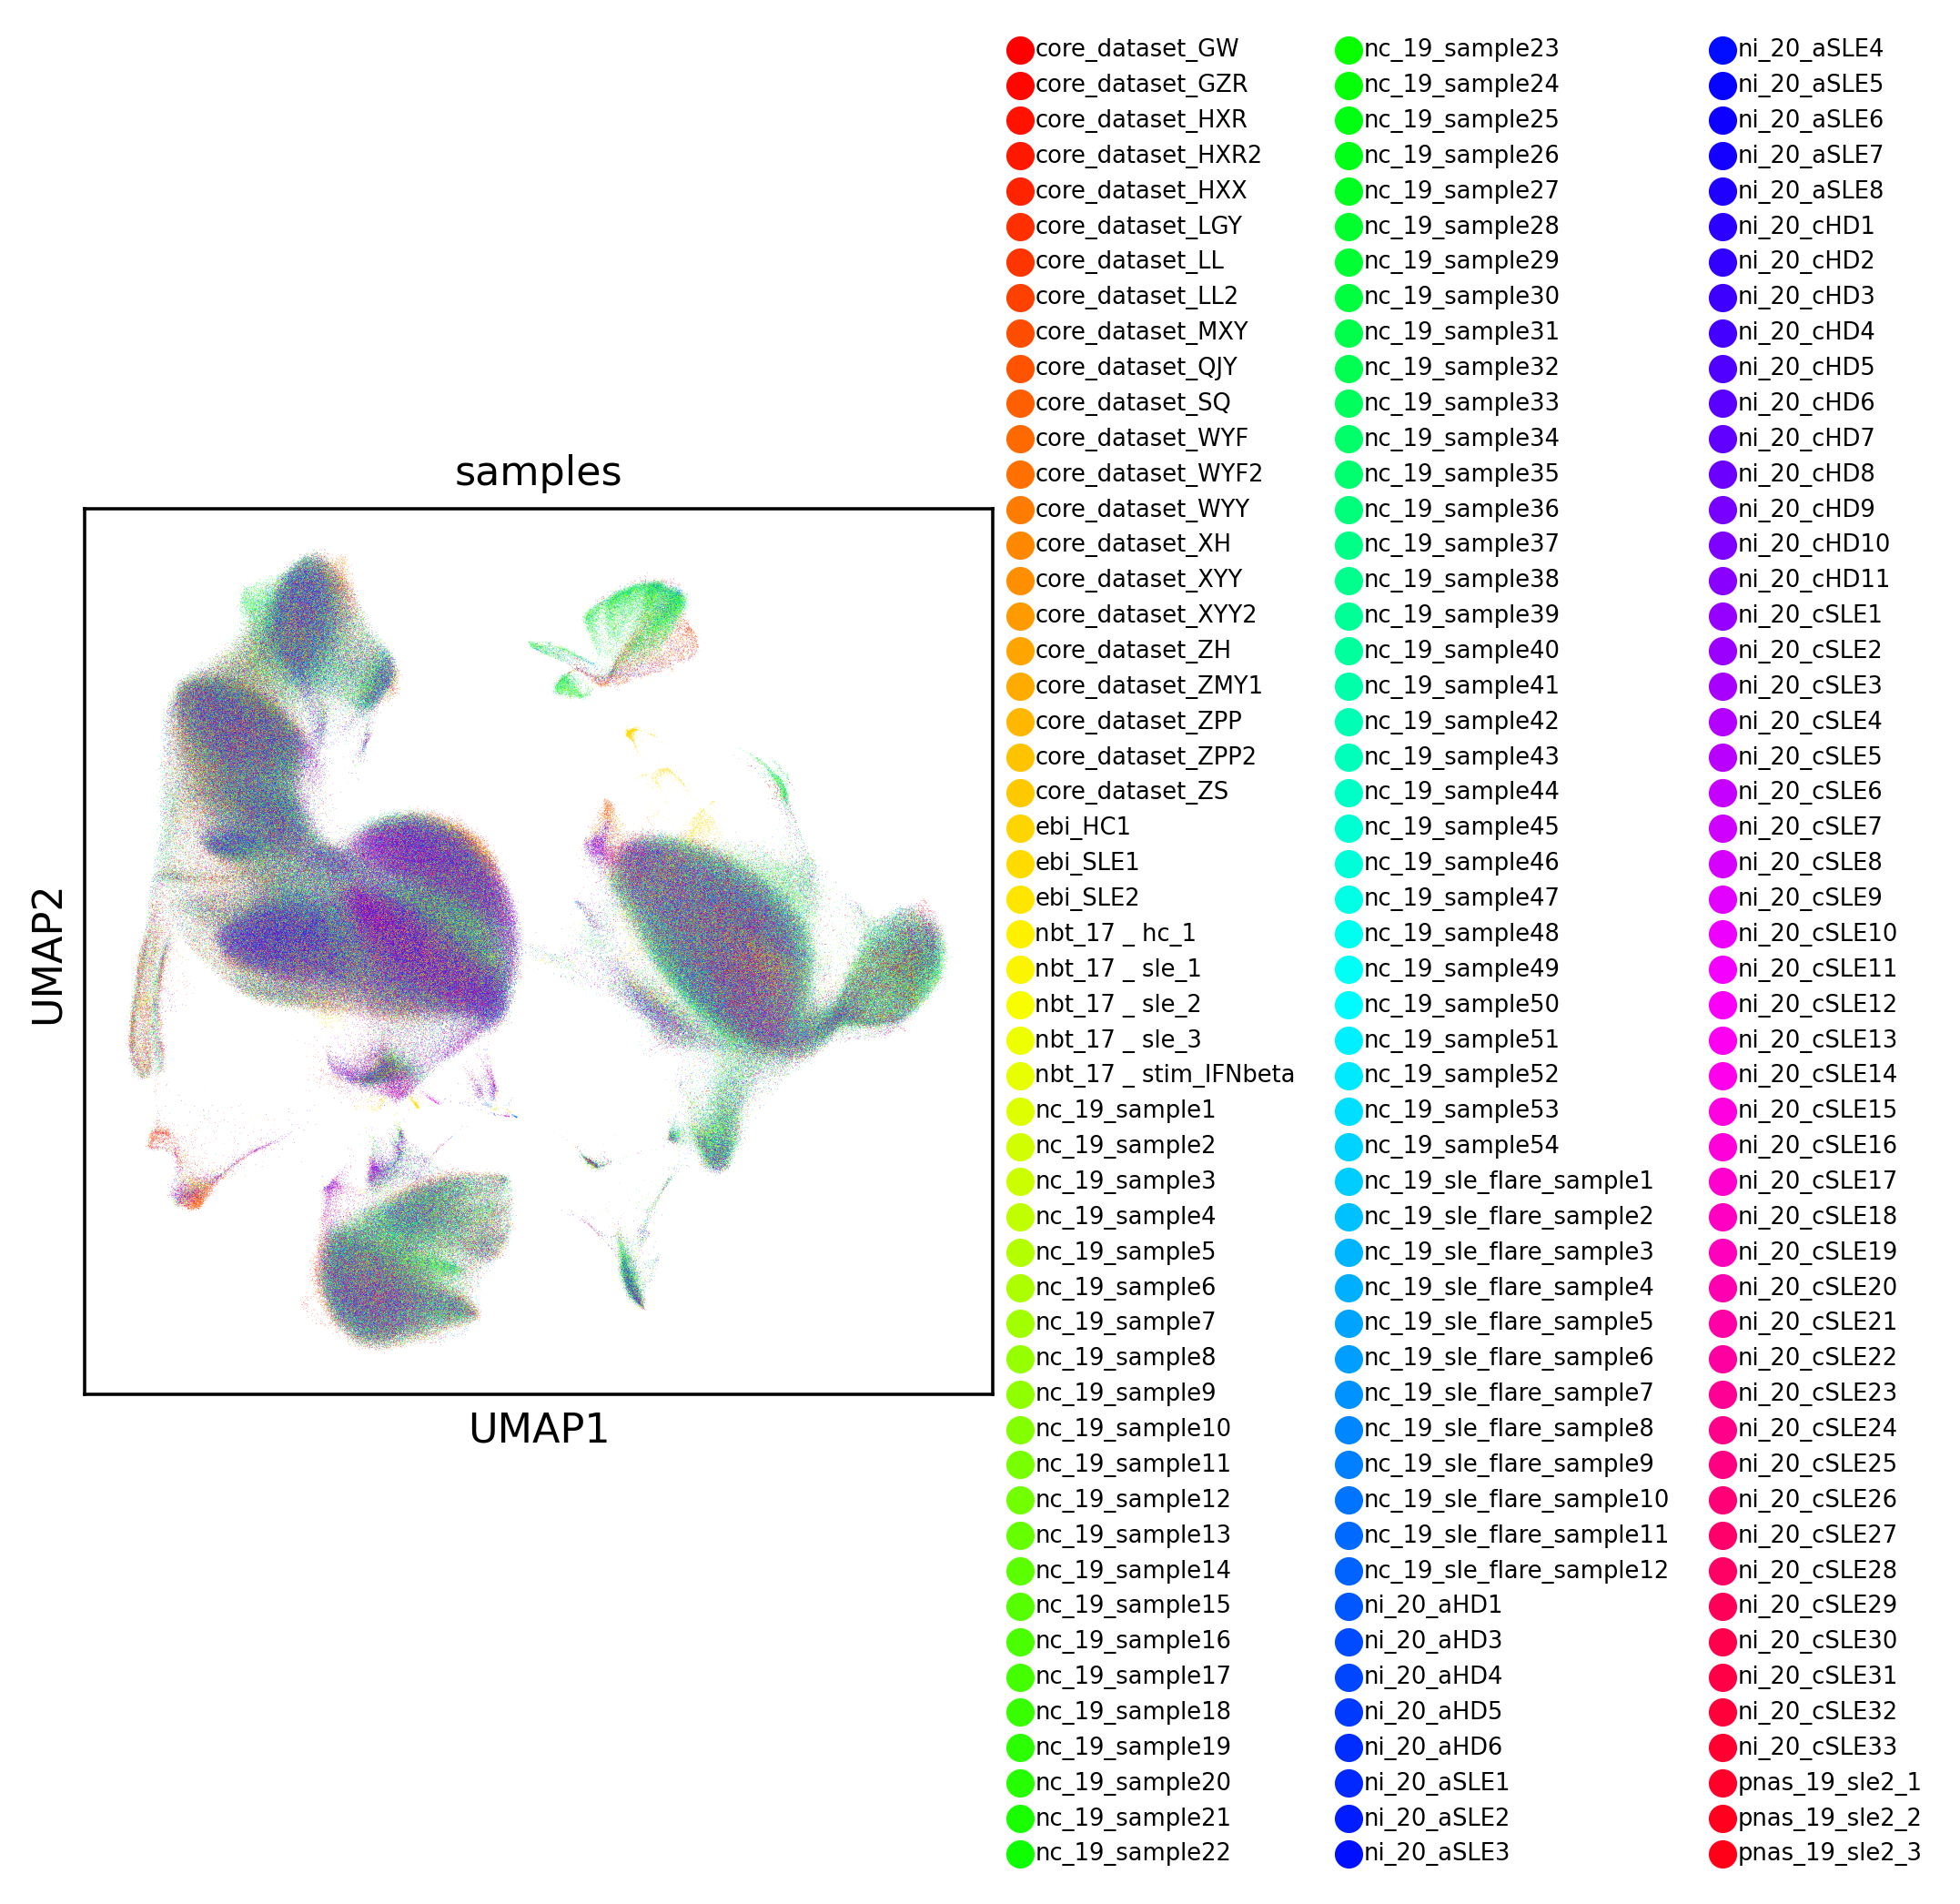

In [29]:
sc.pl.umap(adata,color=['sample'], palette = mcp.gen_color(cmap="hsv",n=156),legend_fontsize='xx-small',outline_color='white',title='samples')

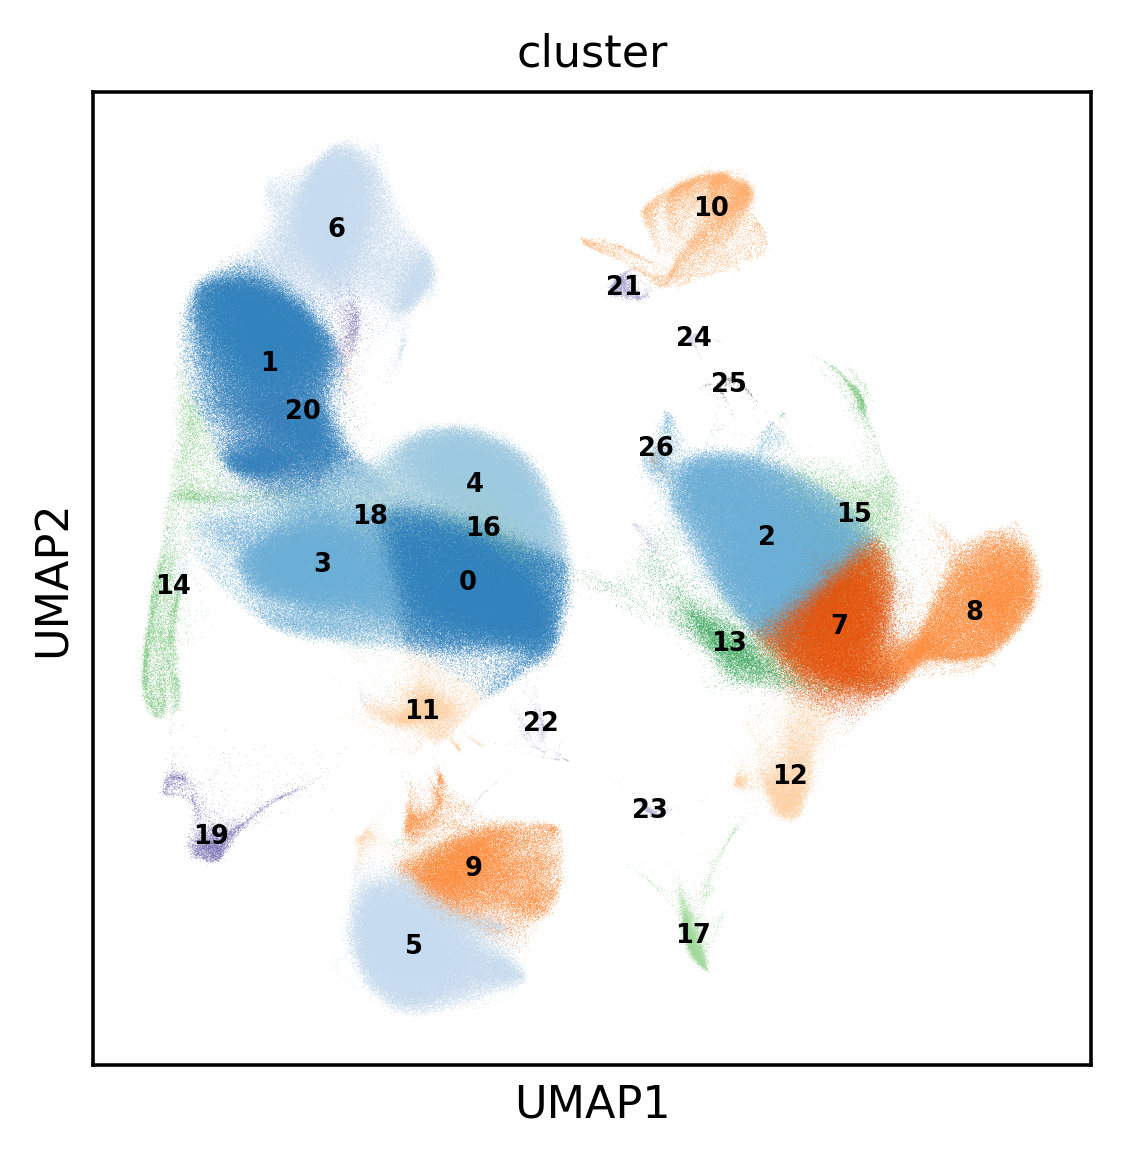

In [31]:
sc.pl.umap(adata,color=['leiden'], palette = mcp.gen_color(cmap="tab20c",n=32),title='cluster', legend_fontsize='xx-small', legend_loc = 'on data') 

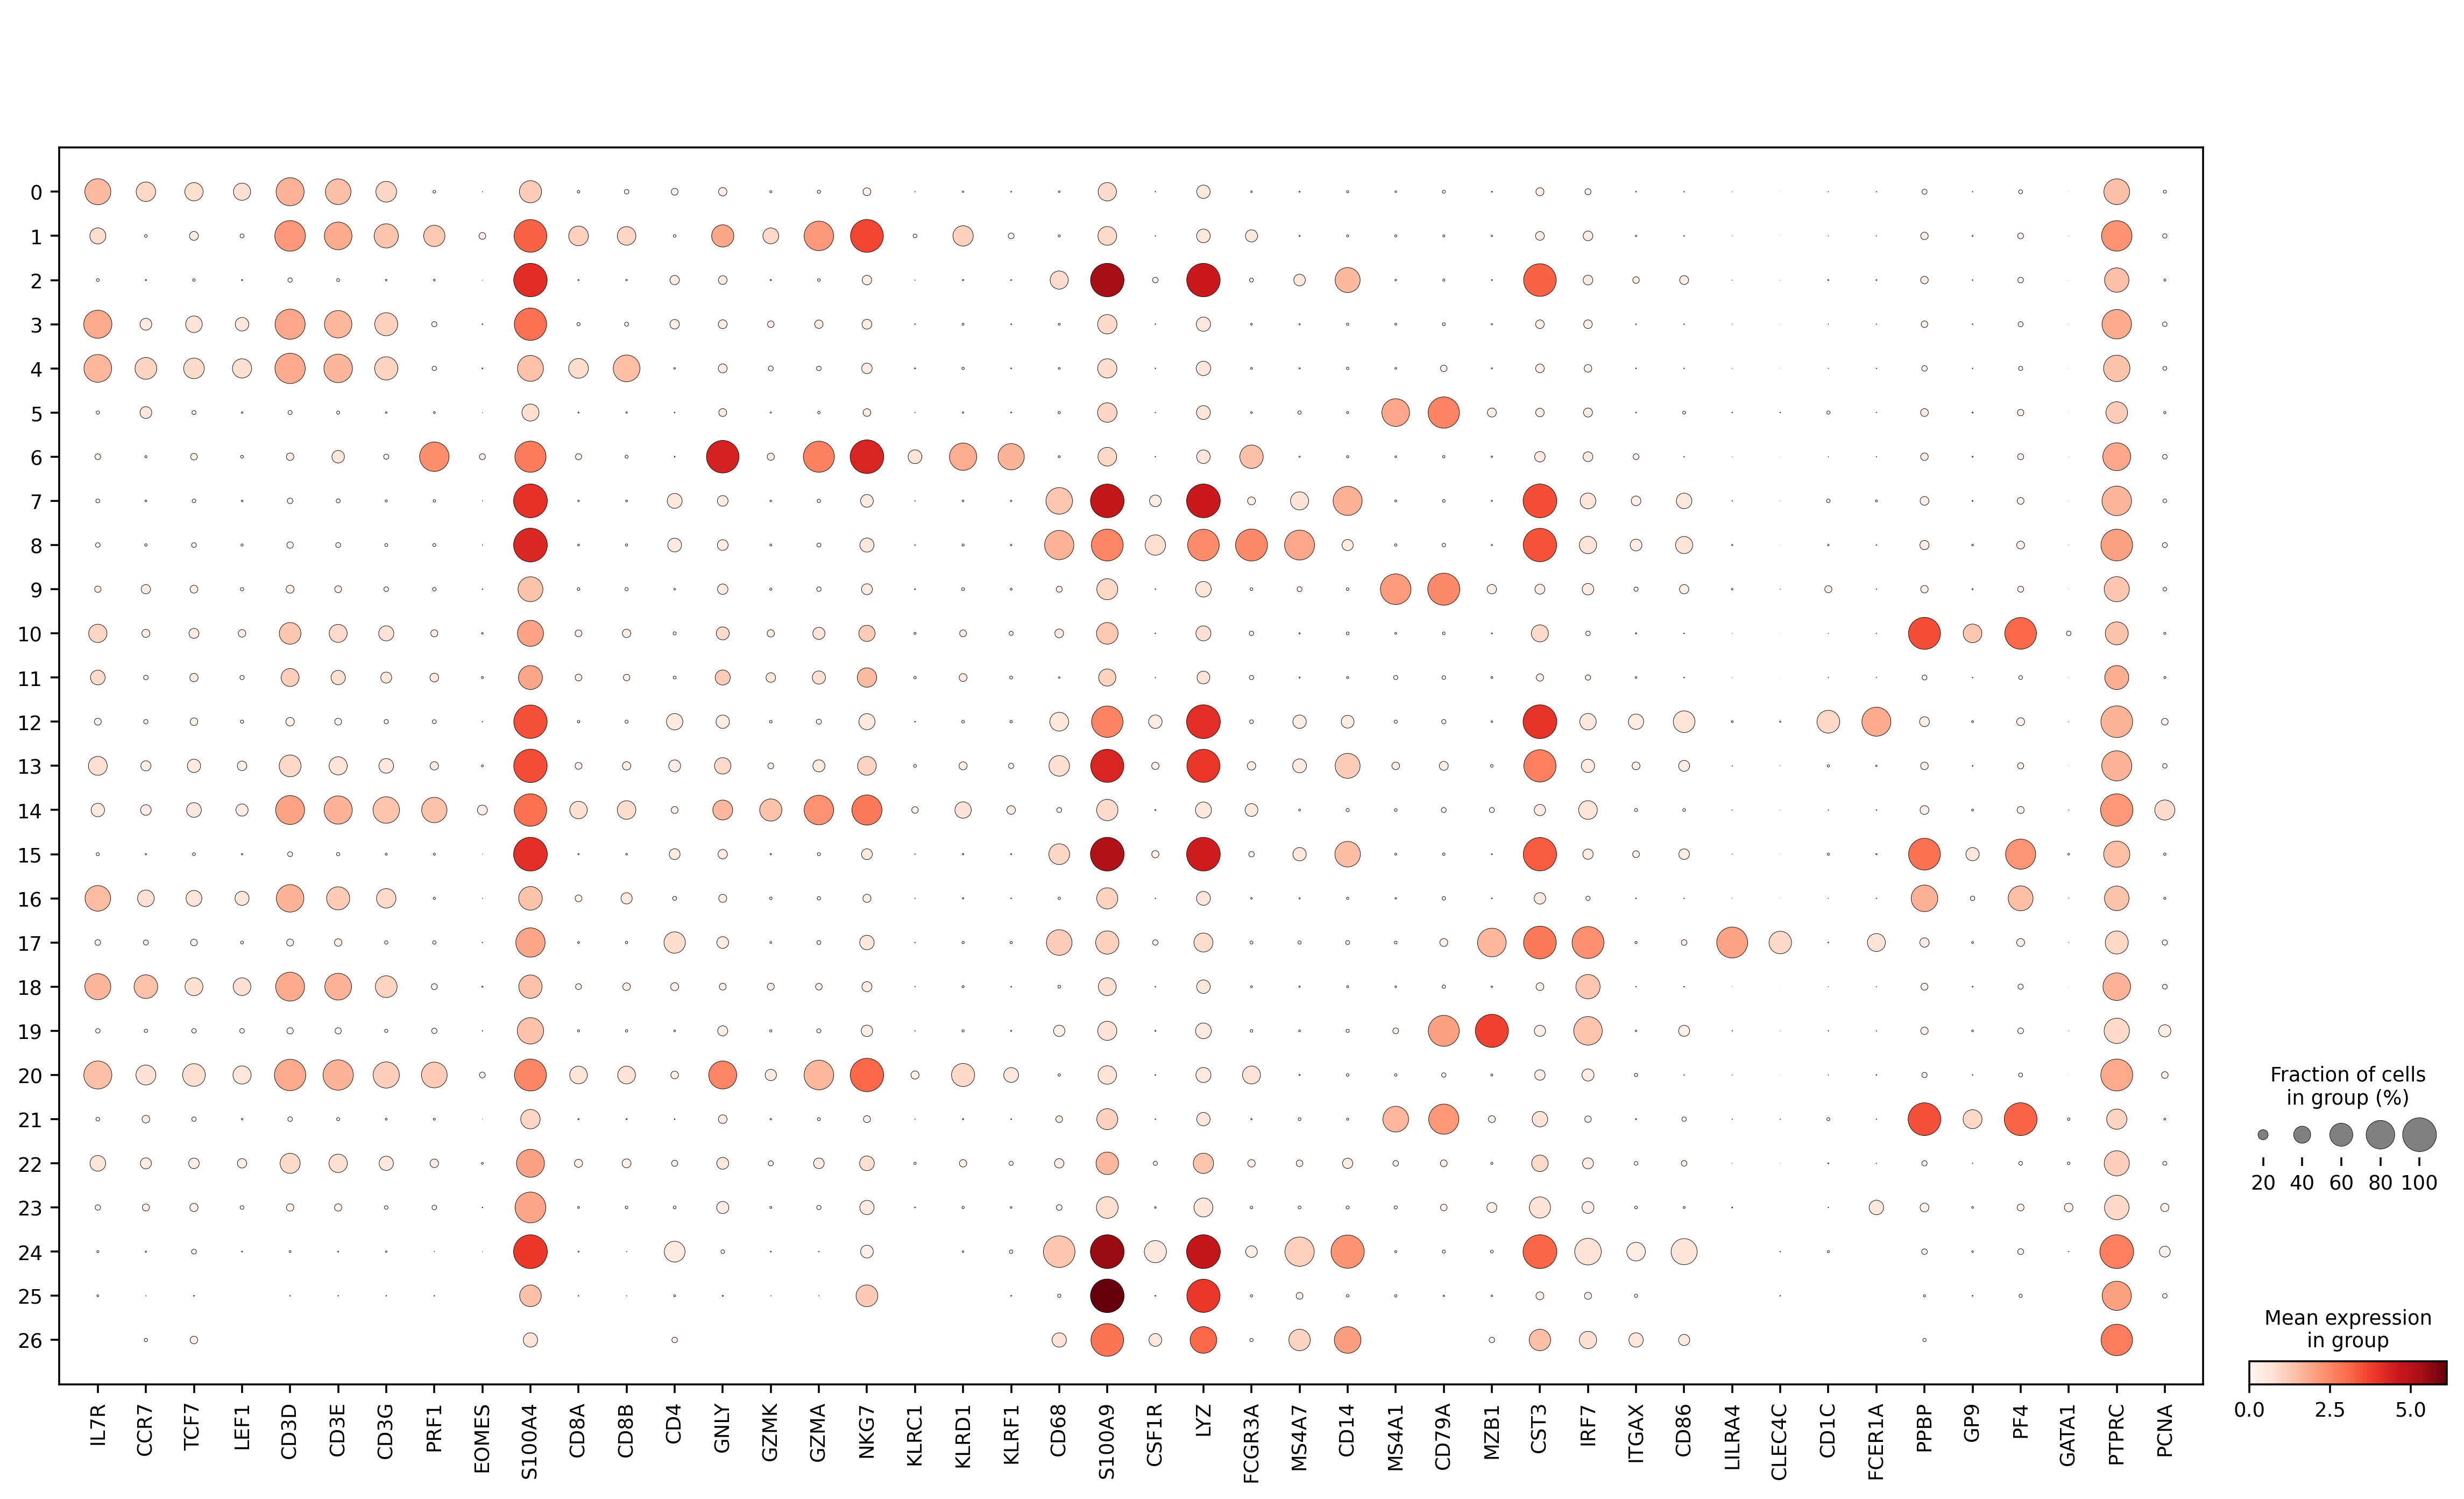

In [34]:
marker_list = [i for i in utils.marker_list if i in adata.raw.var_names]
sc.pl.dotplot(adata, marker_list, groupby='leiden');

In [62]:
adata.obs["main_type"] = "unknown"
# 11 22 23 unknown
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['10','15','21']))].index.tolist(),'main_type'] = 'Platelet'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['0','3','4','16','18','20']))].index.tolist(),'main_type'] = 'T.naive'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['2','7','13','24']))].index.tolist(),'main_type'] = 'Mono.CD14'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['1']))].index.tolist(),'main_type'] = 'T.cyto'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['14']))].index.tolist(),'main_type'] = 'T.prolife'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['5','9']))].index.tolist(),'main_type'] = 'Bcell'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['6']))].index.tolist(),'main_type'] = 'NK'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['8']))].index.tolist(),'main_type'] = 'Mono.CD16'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['17']))].index.tolist(),'main_type'] = 'pDC'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['12']))].index.tolist(),'main_type'] = 'cDC'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['19']))].index.tolist(),'main_type'] = 'plasma'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['22']))].index.tolist(),'main_type'] = 'RBD'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['11']))].index.tolist(),'main_type'] = 'low_quality'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['23']))].index.tolist(),'main_type'] = 'HPSC'
adata.obs.loc[adata.obs[(adata.obs.leiden.isin(['25','26']))].index.tolist(),'main_type'] = 'remove'
adata.obs["main_type"].value_counts()

T.naive        585167
Mono.CD14      341950
T.cyto         223240
Bcell          187115
NK             115530
Mono.CD16       67259
Platelet        40539
low_quality     18983
cDC             17661
T.prolife       14613
pDC              7072
plasma           5773
RBD              1585
HPSC             1286
Name: main_type, dtype: int64

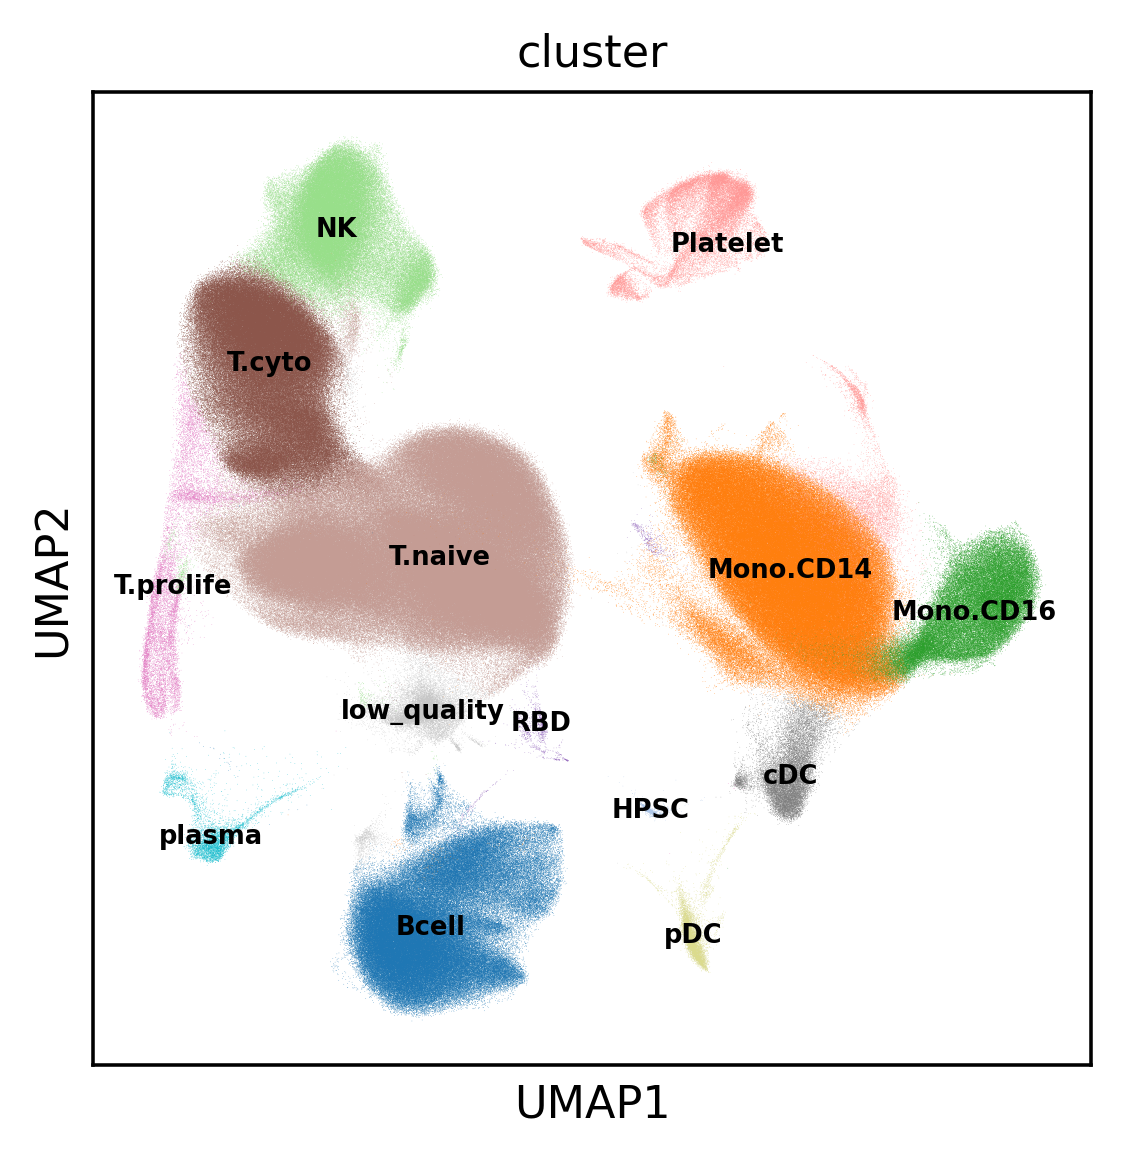

In [67]:
sc.pl.umap(adata,color=['main_type'], palette = mcp.gen_color(cmap="tab20",n=15),title='cluster', legend_fontsize='xx-small', legend_loc = 'on data')

In [51]:
adata.write_h5ad('./output/02-pbmc_concat_harm_anno.h5ad')

In [53]:
adata = adata[~adata.obs["leiden"].isin(["24",'25','26'])]

ranking genes


/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'main_type' as categorical


    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (1:59:24)


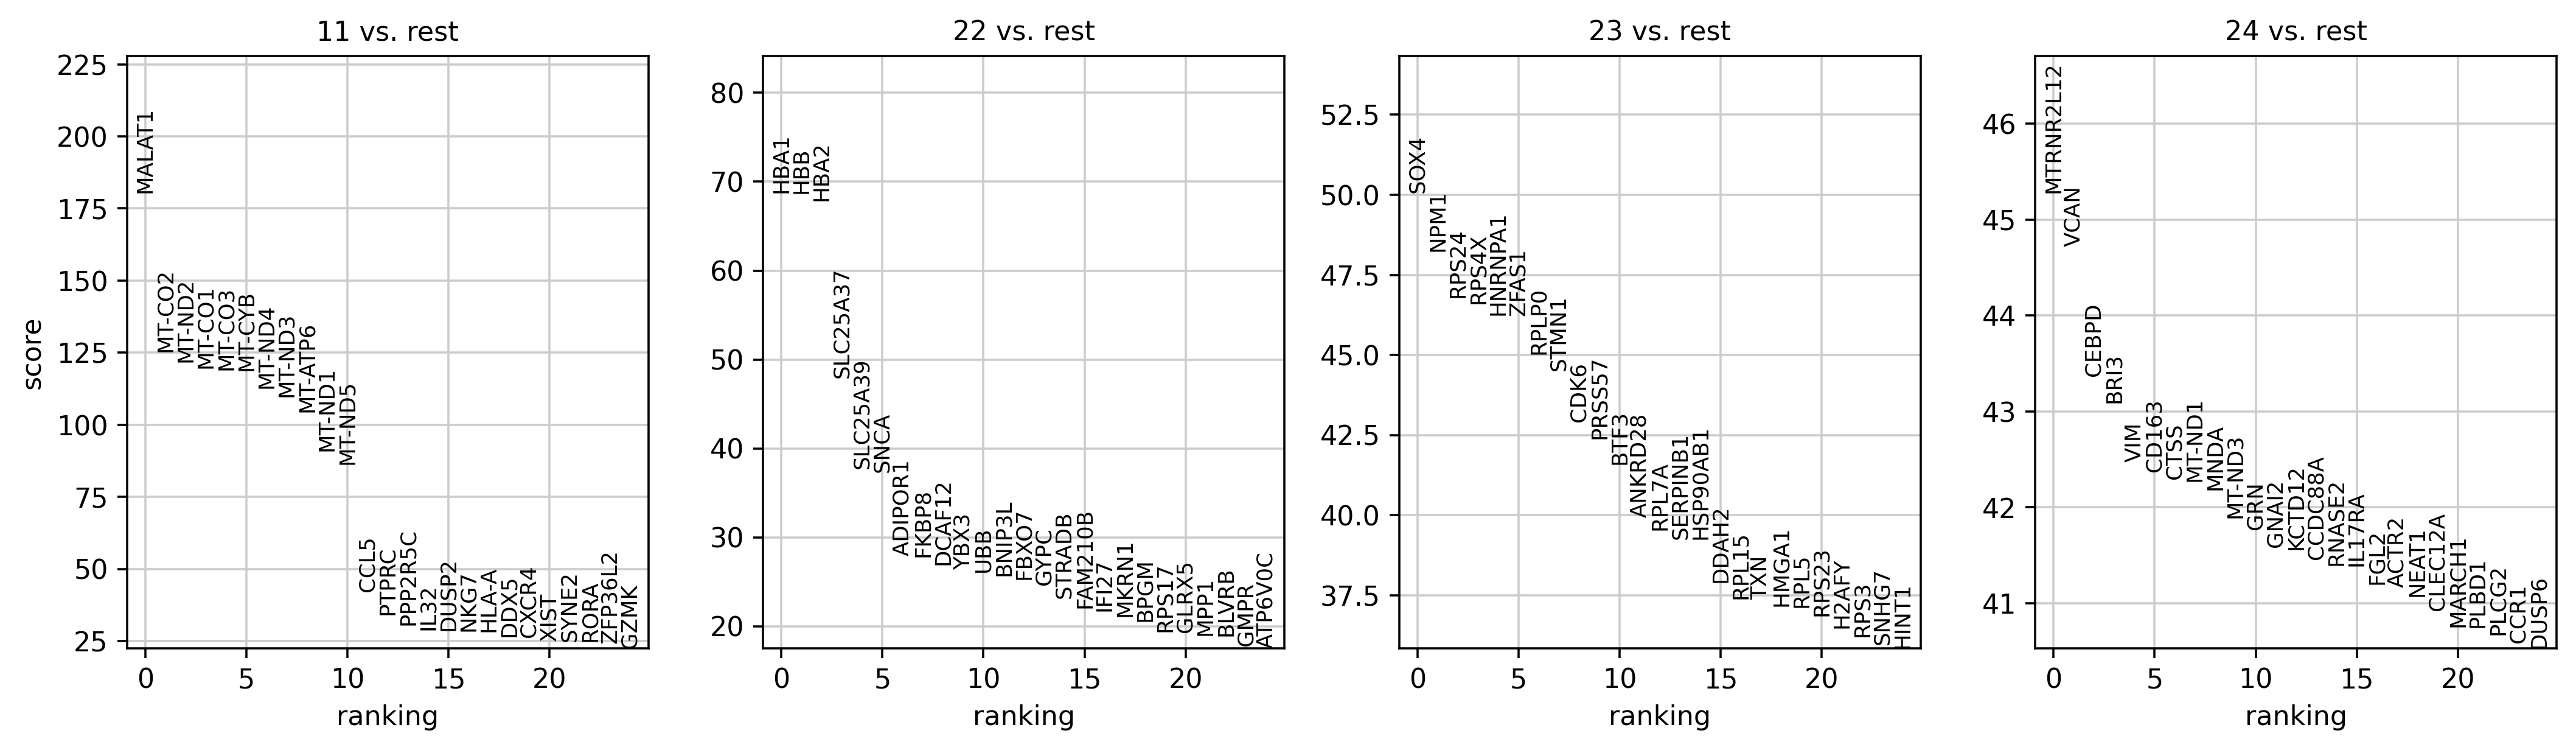

In [37]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon',groups=['11','22','23','24'])
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

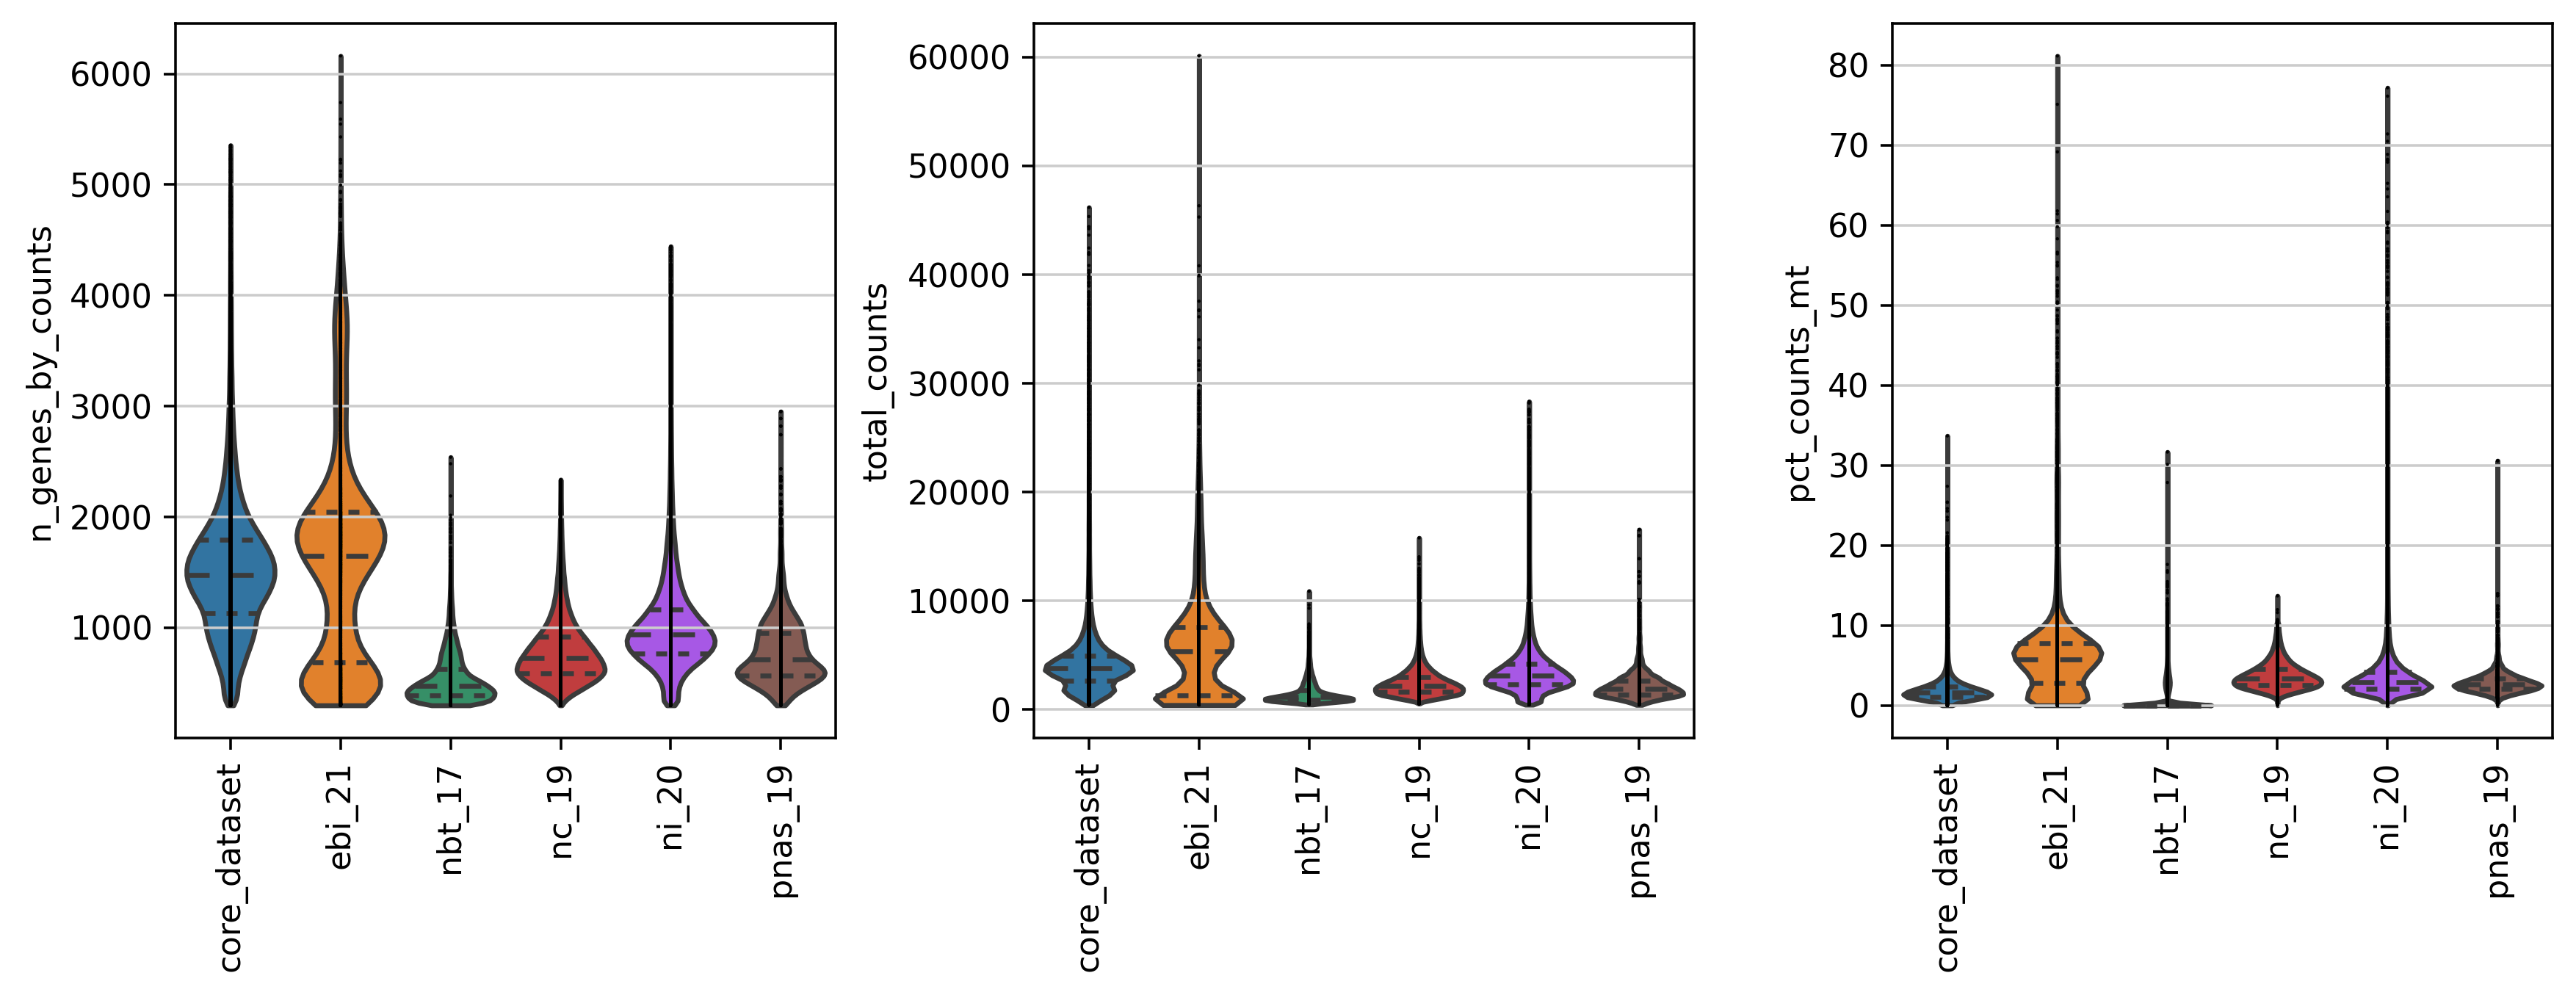

In [69]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=False, multi_panel=False,groupby = 'dataset',rotation=90,inner="quartile")

/home/xiacr/miniconda3/envs/sle/lib/python3.8/site-packages/anndata/_core/anndata.py:1228: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'main_type' as categorical


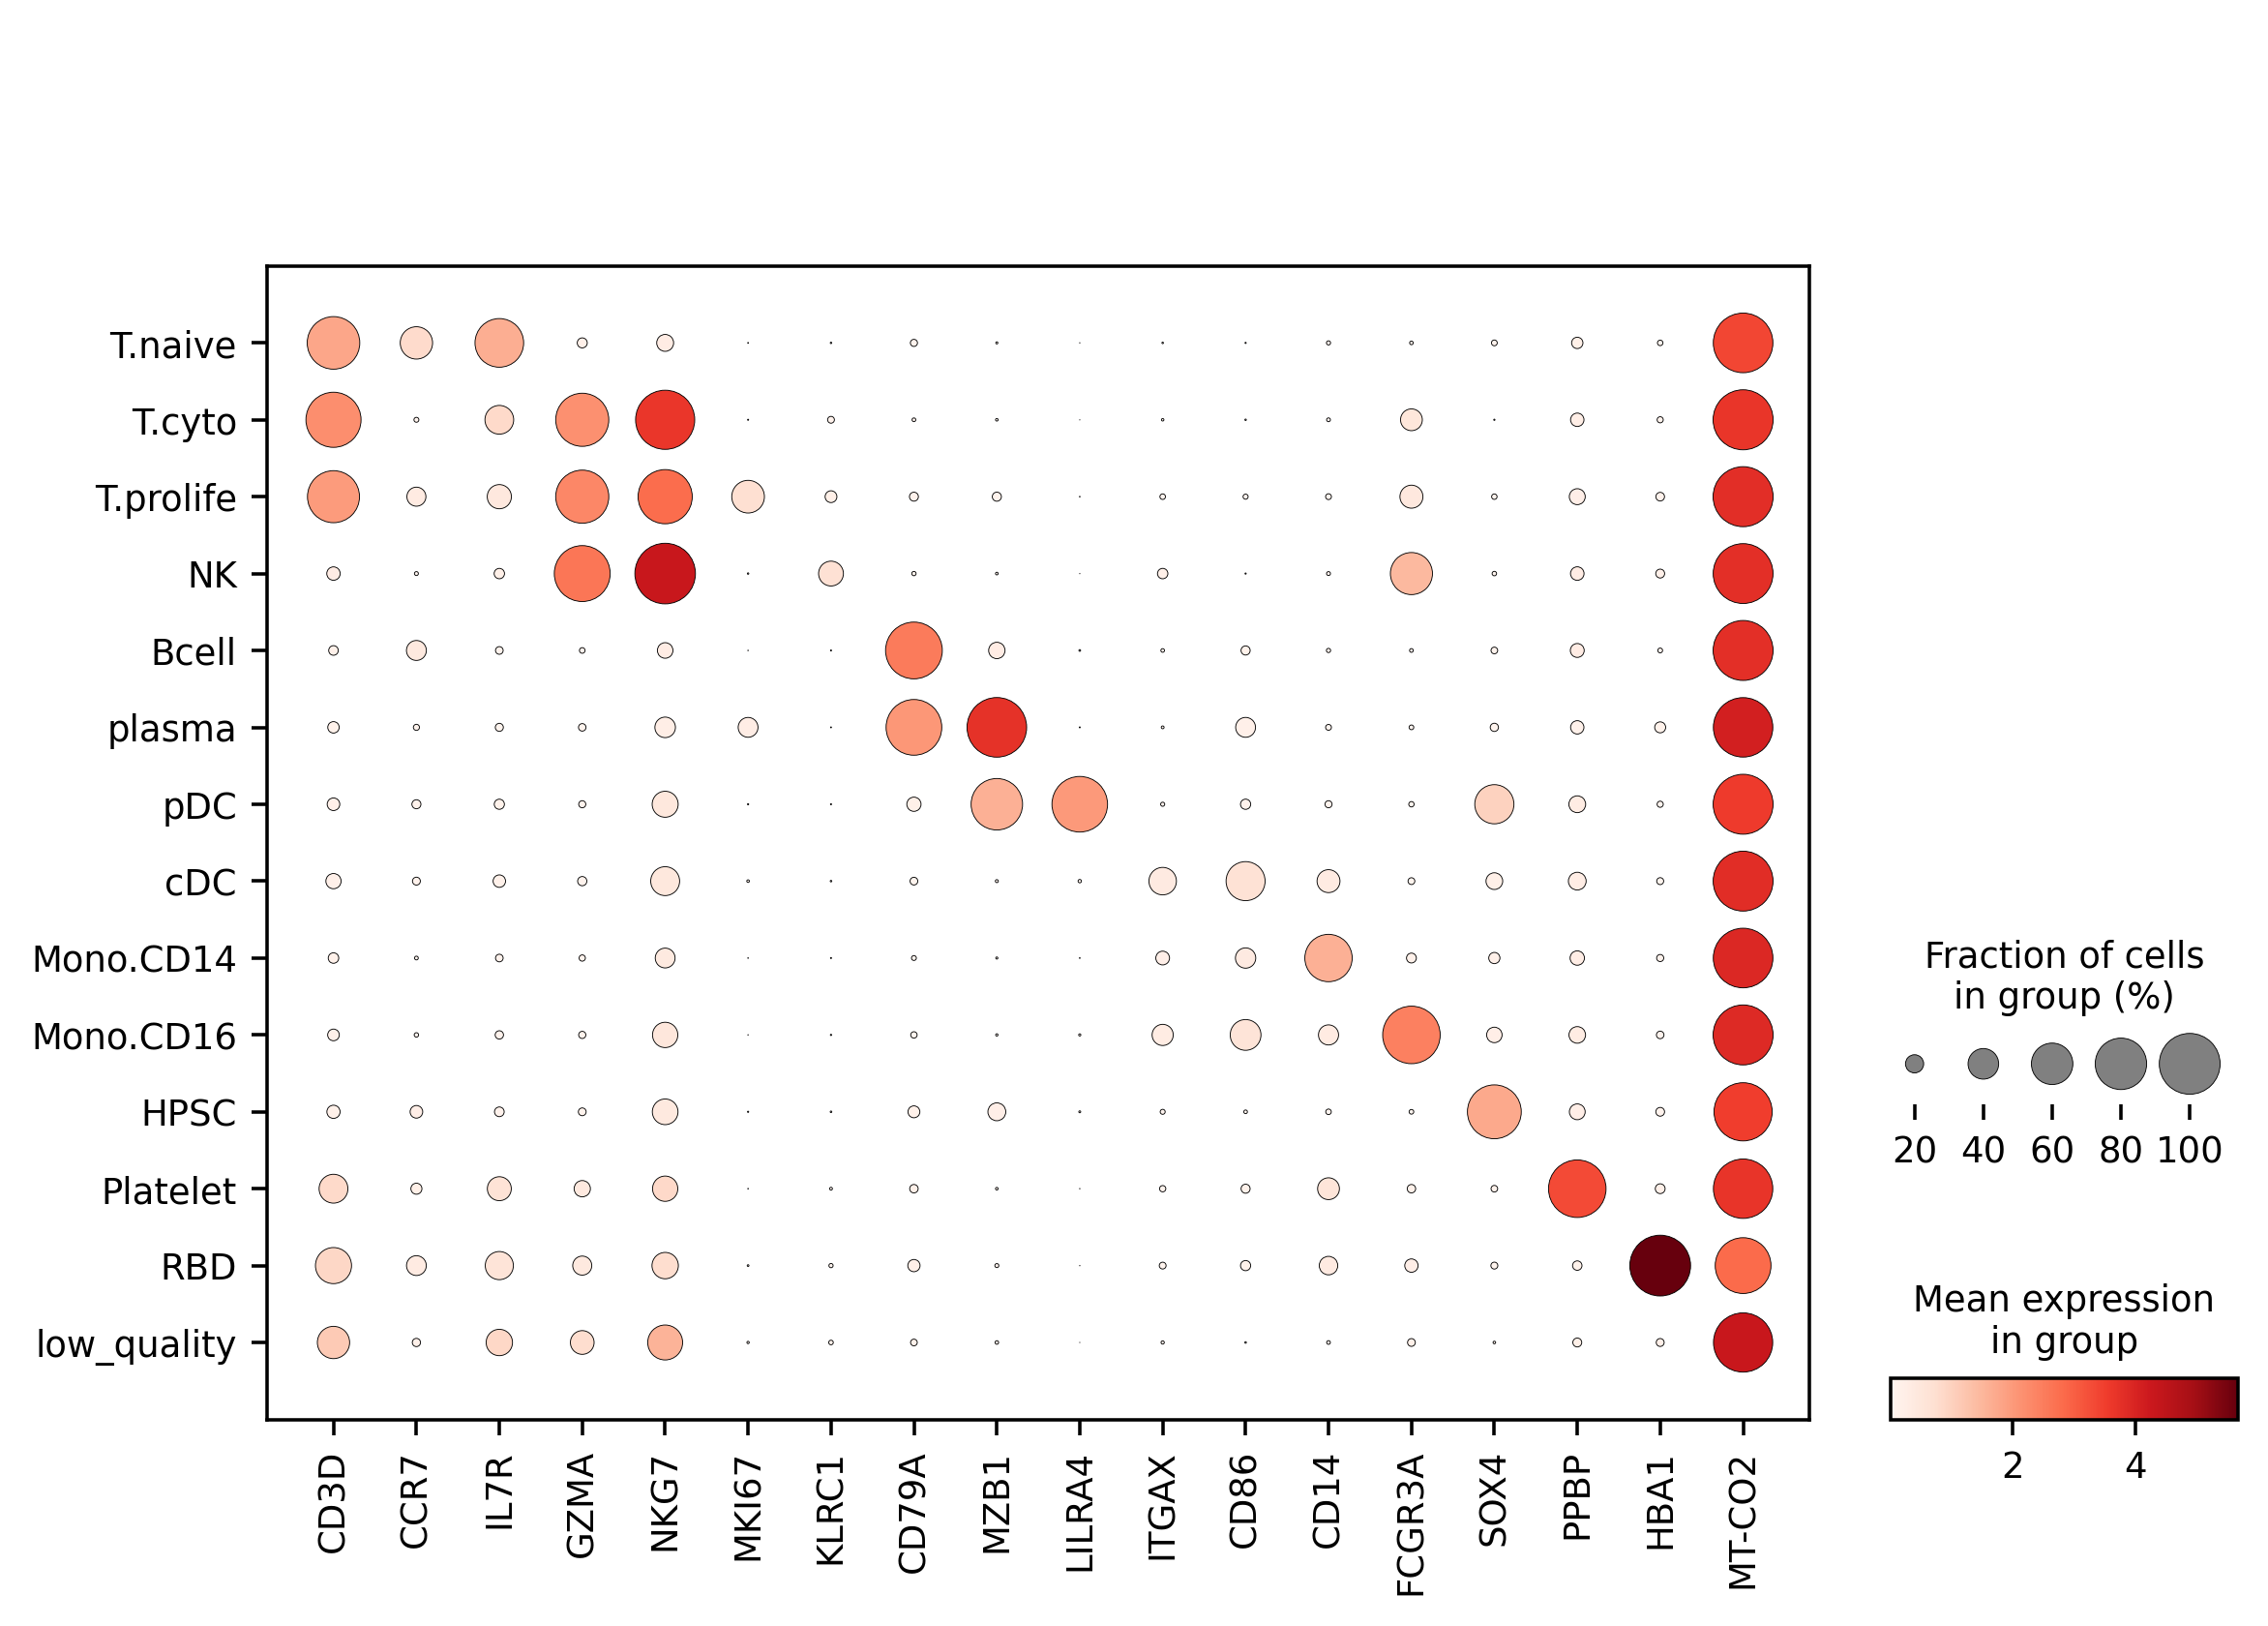

In [63]:
marker_pbmc =  ['CD3D','CCR7','IL7R','GZMA','NKG7','MKI67','KLRC1','CD79A','MZB1','LILRA4',
                 'ITGAX','CD86','CD14','FCGR3A','SOX4','PPBP','HBA1','MT-CO2']
sc.pl.dotplot(adata, marker_pbmc, groupby='main_type',categories_order =["T.naive","T.cyto","T.prolife","NK",
                                               "Bcell","plasma",'pDC',"cDC","Mono.CD14","Mono.CD16",'HPSC',
                                               'Platelet','RBD','low_quality'])

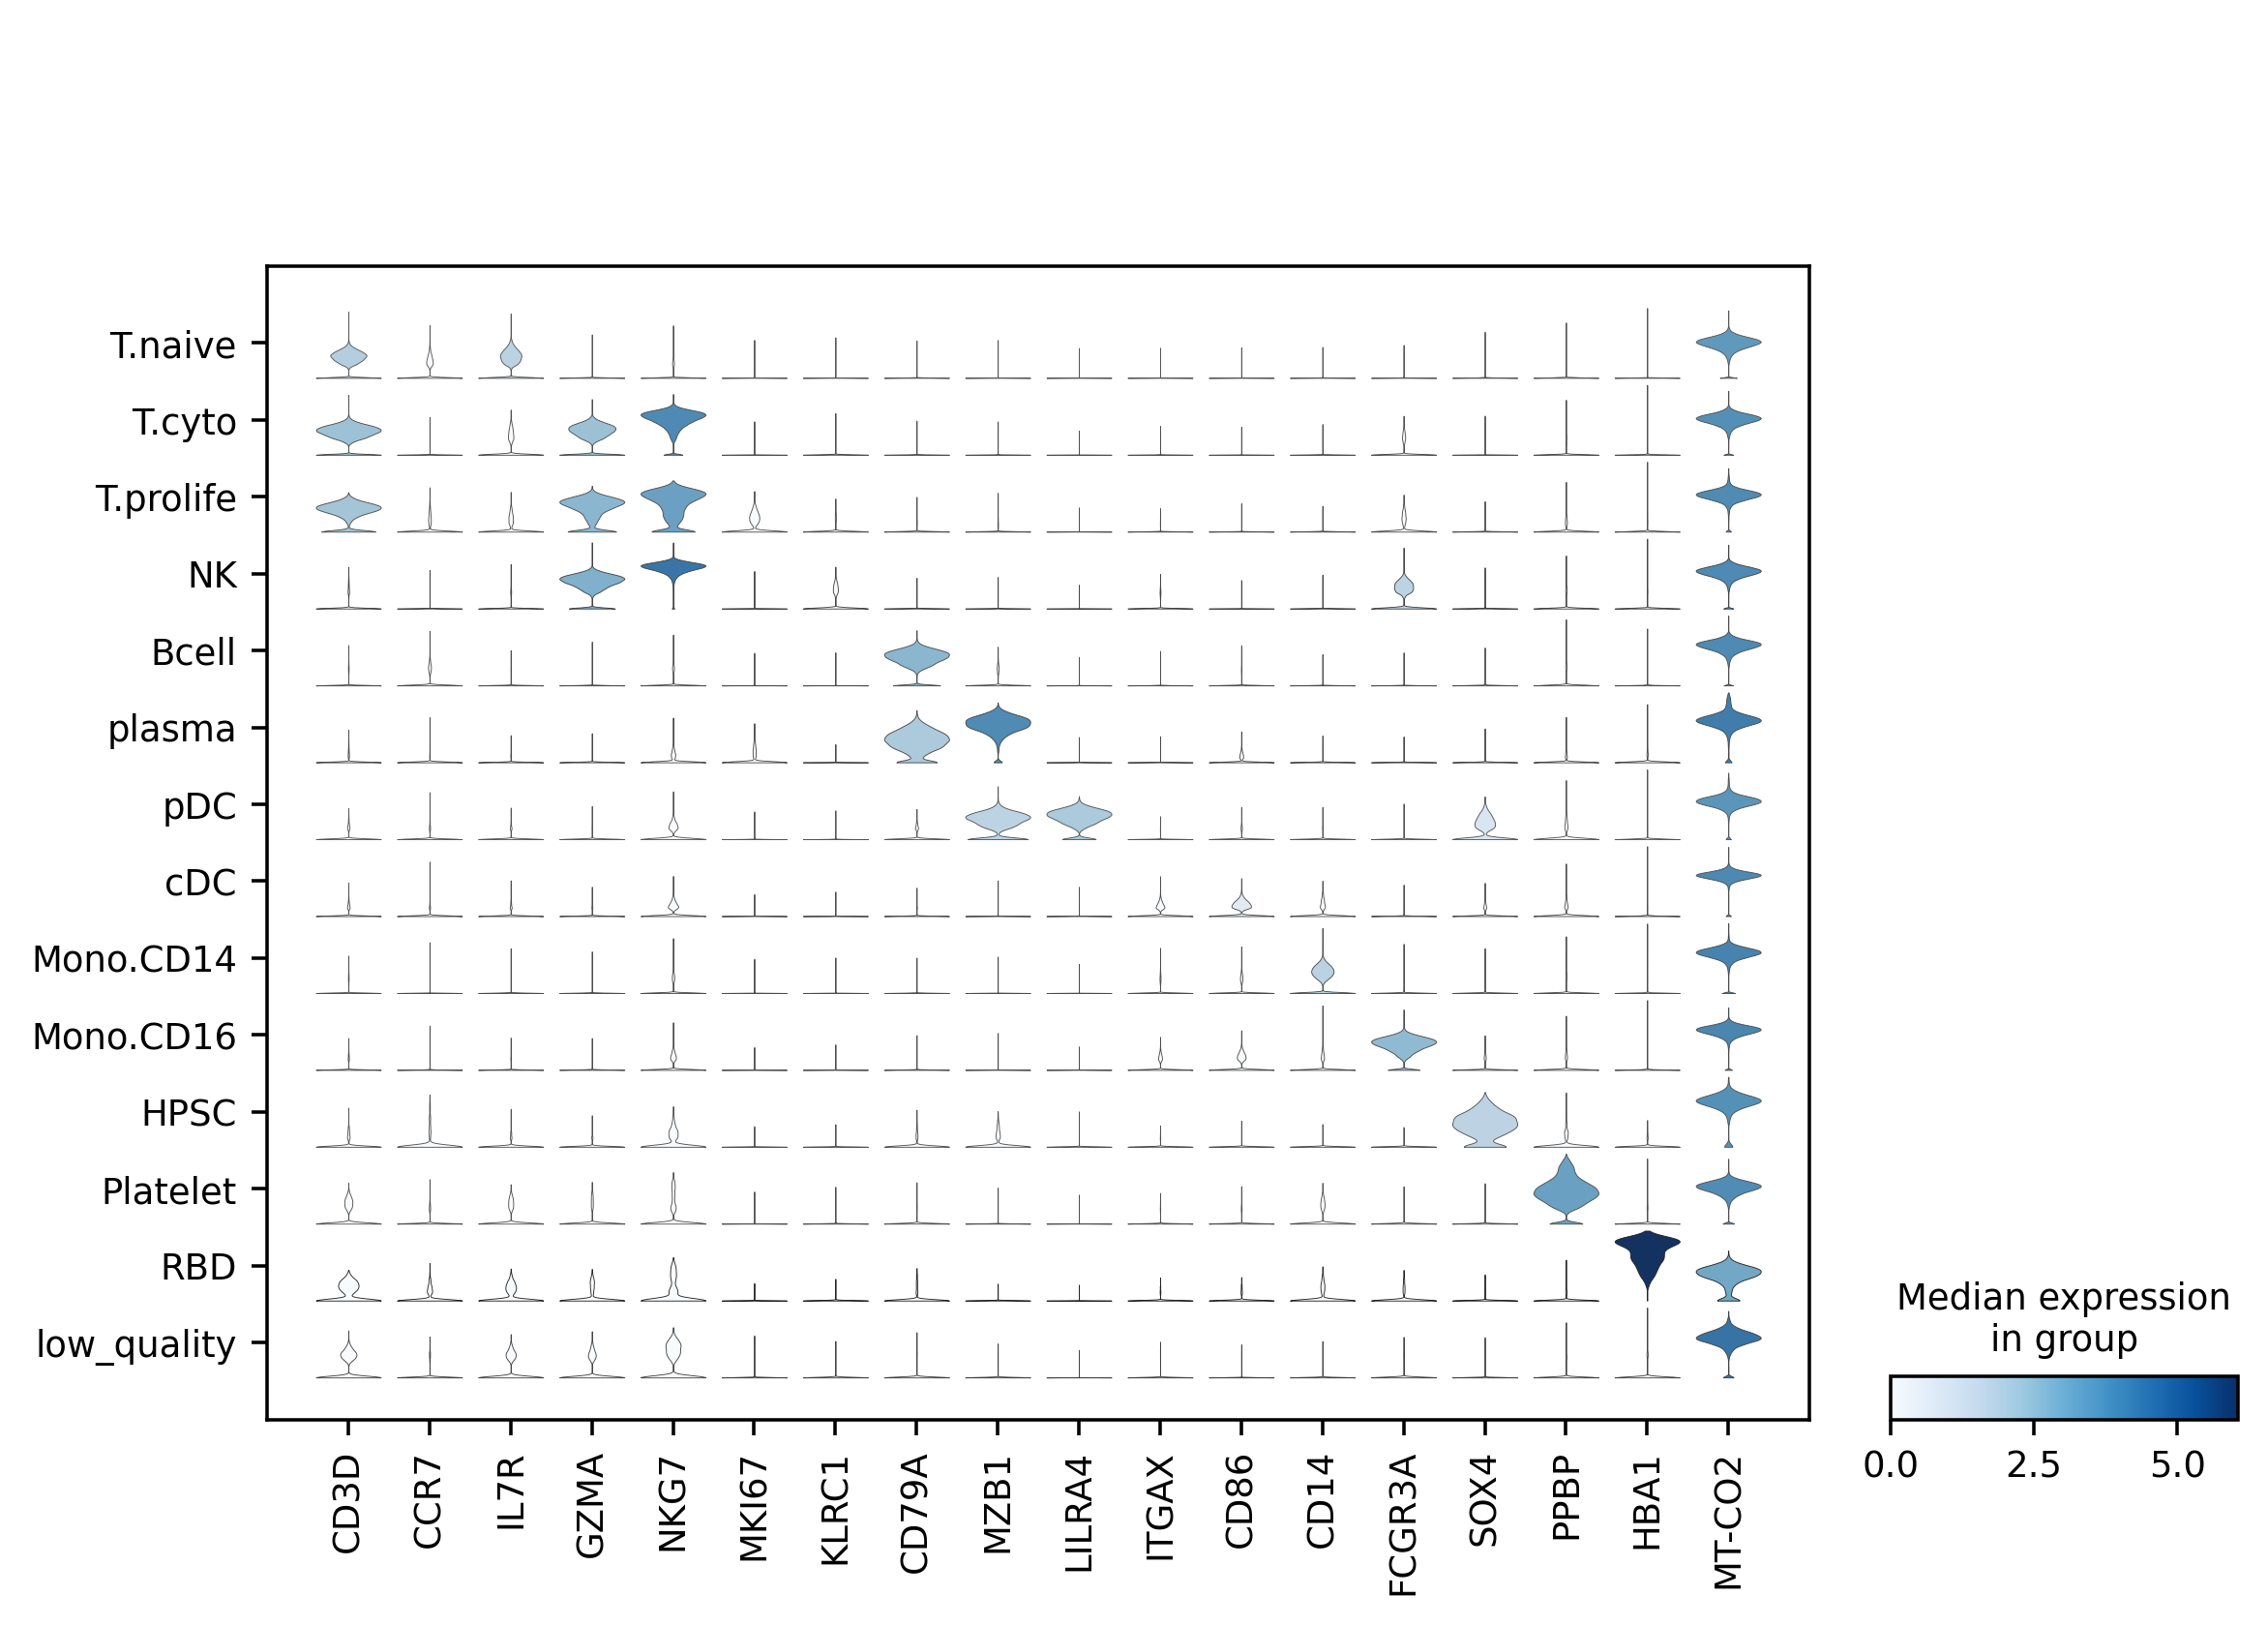

In [65]:
sc.pl.stacked_violin(adata, marker_pbmc, groupby='main_type',categories_order =["T.naive","T.cyto","T.prolife","NK",
                                               "Bcell","plasma",'pDC',"cDC","Mono.CD14","Mono.CD16",'HPSC',
                                               'Platelet','RBD','low_quality'])

## save the PBMC files

In [70]:
adata.obs.to_csv('./output/02-pbmc_concat_harm_anno_meta.csv')

In [92]:
adata.write_h5ad('./output/02-pbmc_concat_harm_anno.h5ad')

# Extract cell main type 

In [93]:
# "T.naive","T.cyto","T.prolife","NK","Bcell","plasma",'pDC',"cDC","Mono.CD14","Mono.CD16",'HPSC','Platelet','RBD'
bcell = adata[adata.obs['main_type'].isin(['Bcell'])]
plasma = adata[adata.obs['main_type'].isin(['plasma'])]
tcell = adata[adata.obs['main_type'].isin(["T.naive","T.cyto","T.prolife","NK"])]
mono_dc = adata[adata.obs['main_type'].isin(["pDC","cDC","Mono.CD14","Mono.CD16"])]
platelet = adata[adata.obs['main_type'].isin(["Platelet"])]

In [94]:
HPSC =  adata[adata.obs['main_type'].isin(["HPSC"])]

In [95]:
bcell.write_h5ad('./output/03-bcell_raw.h5ad')
plasma.write_h5ad('./output/03-plasma_raw.h5ad')
tcell.write_h5ad('./output/03-tcell_raw.h5ad')
mono_dc.write_h5ad('./output/03-mono_dc_raw.h5ad')
platelet.write_h5ad('./output/03-platelet_raw.h5ad')
HPSC.write_h5ad('./output/03-HPSC_raw.h5ad')

In [96]:
del bcell; del plasma; del tcell;del mono_dc; del platelet

In [101]:
import gc
gc.enable()
gc.collect()

34390